<a href="https://colab.research.google.com/github/sayarghoshroy/Manifold_Learning/blob/master/manifold_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manifold Learning

## Concepts and Examples of Manifold Learning and Spectral Clustering. 

### Topics

 - Spectral Clustering
 - Manifold Visualization
 - Clustering and Visualizing high-dimensional data
 - Applications in Classification

In [1]:
import sys
# Uncomment in case requirement is not satisfied
# !{sys.executable} -m pip install numpy sklearn tensorflow keras
# !{sys.executable} -m pip install matplotlib==3.0.3

import numpy
np = numpy
# 'np' and 'numpy' can be used interchangeably
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Spectral Clustering

Implementation of spectral clustering with evaluation on data in the form of two concentric circles.

### Implementation

Implementation of spectral clustering from scratch.

In [2]:
# Spectral Clustering

def spectral_clustering(X):
  '''
    X: numpy.array of shape [num_samples, input_dim]
    - returns Y_pred: numpy.array of shape [num_samples], an array of cluster labels
  '''
  size = X.shape[0]
  D_matrix = np.zeros((size, size))
  W = np.zeros((size, size))

  for i in range(size):
      for j in range(size):
          W[i][j] = np.exp(-np.power(np.linalg.norm(X[i] - X[j]), 2) / (1e-2))
          D_matrix[i][i] += W[i][j]

  L = np.eye(size) - np.sqrt(np.linalg.pinv(D_matrix)) @ W @ np.sqrt(np.linalg.pinv(D_matrix))
  
  eigenvalues, eigenvectors = np.linalg.eig(L)
  sorter = eigenvalues.argsort()
  values = eigenvalues[sorter]
  vectors = eigenvectors[:, sorter]

  Y_values = []
  for i in range(np.shape(vectors[:, 1])[0]):
    if (vectors[:, 1][i].real > 0):
      Y_values.append(1)
    else:
      Y_values.append(0)
  return np.asarray(Y_values)

## Clustering Concentric Circles

Performing spectral clustering on the concentric circles dataset.

In [3]:
from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points of shape [n_samples, 2]
# CY: true clusters of shape [n_samples]

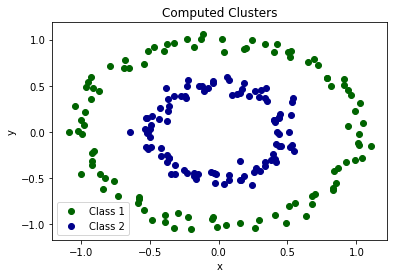

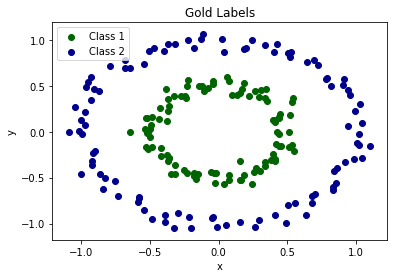

In [4]:
x_1 = []
x_2 = []
y_1 = []
y_2 = []
x_1_gold = []
x_2_gold = []
y_1_gold = []
y_2_gold = []

pred = spectral_clustering(CX)

size = np.shape(pred)[0]

for i in range(size):
    if (pred[i] > 0):
        x_1.append(CX[i][0])
        y_1.append(CX[i][1])
    elif (pred[i] <= 0):
        x_2.append(CX[i][0])
        y_2.append(CX[i][1])
    if (CY[i] > 0):
        x_1_gold.append(CX[i][0])
        y_1_gold.append(CX[i][1])
    elif (CY[i] <= 0):
        x_2_gold.append(CX[i][0])
        y_2_gold.append(CX[i][1])

plt.title('Computed Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_1, y_1, color = 'darkgreen', label = 'Class 1')
plt.scatter(x_2, y_2, color = 'darkblue', label = 'Class 2')
plt.legend()
plt.show()

plt.title('Gold Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_1_gold, y_1_gold, color = 'darkgreen', label = 'Class 1')
plt.scatter(x_2_gold, y_2_gold, color = 'darkblue', label = 'Class 2')
plt.legend()
plt.show()

## Evaluating accuracy

Comparing predicted labelling with the true labels.

Percentage Accuracy = 100.0


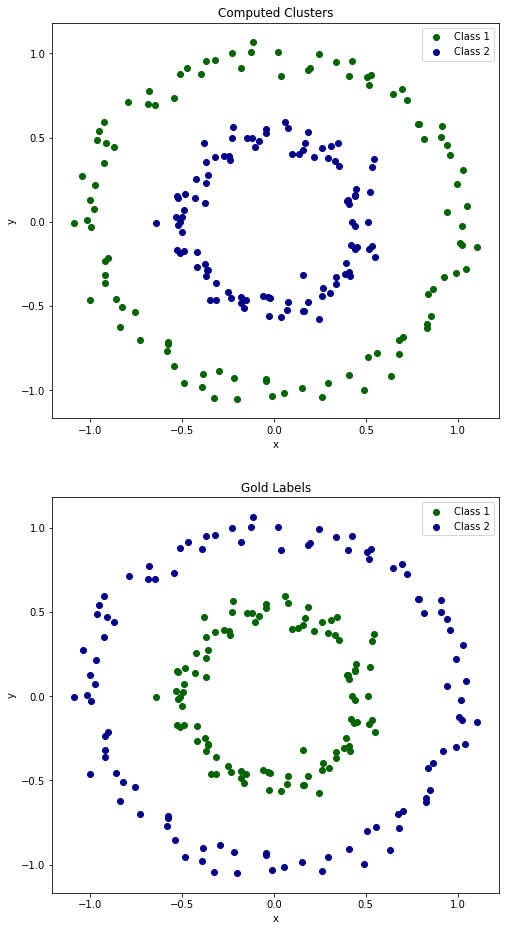

In [5]:
# Reporting the clustering accuracy

match = mismatch = 0

for i in range(size):
    if (pred[i] == CY[i]):
        match += 1
    else:
        mismatch += 1

accuracy = max(match, mismatch) * 100 / size
print("Percentage Accuracy = " + str(accuracy))

fig = plt.figure(figsize = (8, 16))
a = fig.add_subplot(211)
a.set_title('Computed Clusters')
a.set_xlabel('x')
a.set_ylabel('y')
a.scatter(x_1, y_1, color = 'darkgreen', label = 'Class 1')
a.scatter(x_2, y_2, color = 'darkblue', label = 'Class 2')
a.legend()

b = fig.add_subplot(212)
b.set_title('Gold Labels')
b.set_xlabel('x')
b.set_ylabel('y')
b.scatter(x_1_gold, y_1_gold, color = 'darkgreen', label = 'Class 1')
b.scatter(x_2_gold, y_2_gold, color = 'darkblue', label = 'Class 2')
b.legend()

plt.show()



---



# Manifold Visualization
Implementation of various manifold learning methods with visualization on chosen datasets.


## MDS
To demonstrate Multi-Dimensional Scaling.

In [6]:
# MDS

def MDS(X, k, output_dim=2):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    k: number of nearest neighbours to construct the KNN graph
    output_dim: dimension of output data
    - returns Y: numpy.array of shape [n_samples, output_dim]
  '''
  size = np.shape(X)[0]
  distances = np.zeros(shape = (size, size))
  for i in range(size):
      for j in range(size):
          distances[i][j] = np.linalg.norm(X[i] - X[j])

  ones = np.ones(shape = (size, 1))
  H_matrix = np.eye(size) -  np.matmul(ones, ones.T) * (1 / size)
  kernel = (- 1 / 2) * np.dot(np.dot(H_matrix, distances), H_matrix)
  stack = []
  eigenvalues, eigenvectors = np.linalg.eig(kernel)
  sorter = eigenvalues.argsort()   
  values = eigenvalues[sorter]
  vectors = eigenvectors[:, sorter]
  
  for i in range(1, output_dim + 1):
      stack.append(vectors[:, -i] * np.sqrt(values[-i]))
  Y = np.column_stack(tuple(stack))
  return Y

## LLE
Demonstrating Locally Linear Embedding Function

In [7]:
def LLE(X, k, output_dim = 2):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    k: number of nearest neighbours to construct the KNN graph
    output_dim: dimension of output data
    - returns Y: numpy.array of shape [n_samples, output_dim]
  '''
  size = np.shape(X)[0]
  distances = kneighbors_graph(X, k, mode = 'connectivity', include_self = False).toarray()
  w = np.zeros(shape = (size, k))
  for i in range(size):
    x_cap = []
    for j in range(k):
        x_cap.append(X[i])
    x_cap = np.column_stack(tuple(x_cap))
    
    N = []
    for j in range(size):
        if distances[i][j] != 0:
            N.append(X[j])
    
    N = np.column_stack(tuple(N))
    
    G = np.matmul((x_cap - N).T, (x_cap - N))

    temp = np.power(np.linalg.svd(x_cap - N, compute_uv = 0), 2)
    sigma_squared = temp / temp.sum()
    
    G.flat[:: k+1] = G.flat[:: k+1] + np.sum(sigma_squared[output_dim: ])

    temp = np.linalg.solve(G, np.ones(shape = (k,1)))
    store = temp / np.sum(temp)

    for m in range(np.shape(store)[0]):
        w[i][m] = store[m]
  
  I_stacker = []
  W_stacker = []

  for i in range(size):
    I = np.zeros(shape = (size, 1))
    I[i] = 1
    I_stacker.append(I)

    counter = 0
    W = np.zeros(shape = (size, 1))
    
    for j in range(size):
        if distances[i][j] != 0:
            W[j][0] = w[i][counter]
            counter += 1
    W_stacker.append(W)
  W_stacker = np.column_stack(tuple(W_stacker))
  I_stacker = np.column_stack(tuple(I_stacker))

  M = np.matmul((I_stacker - W_stacker), (I_stacker - W_stacker).T)

  stack = []
  eigenvalues, eigenvectors = np.linalg.eig(M)
  sorter = eigenvalues.argsort()   
  values = eigenvalues[sorter].real
  vectors = eigenvectors[:, sorter].real
  
  for i in range(1, output_dim + 1):
      stack.append(vectors[:, i])
  Y = np.column_stack(tuple(stack))
  return Y

## ISOMAP
Demonstrating Isomap Visualization  

In [8]:
from sklearn.utils.graph_shortest_path import graph_shortest_path
from sklearn.neighbors import kneighbors_graph

In [9]:
# Isomap

def ISOMAP(X, k, output_dim=2):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    k: number of nearest neighbours to construct the KNN graph
    output_dim: dimension of output data
    - returns Y: numpy.array of shape [n_samples, output_dim]
  '''
  size = np.shape(X)[0]
  distances = graph_shortest_path(kneighbors_graph(X, k, mode = 'distance', include_self = True).toarray(), directed = False)
  distances = distances * distances

  ones = np.ones(shape = (size, 1))
  H_matrix = np.eye(size) -  np.matmul(ones, ones.T) * (1 / size)
  kernel = (- 1 / 2) * np.dot(np.dot(H_matrix, distances), H_matrix)
  stack = []
  eigenvalues, eigenvectors = np.linalg.eig(kernel)
  sorter = eigenvalues.argsort()   
  values = eigenvalues[sorter]
  vectors = eigenvectors[:, sorter]
  
  for i in range(1, output_dim + 1):
      stack.append(vectors[:, -i] * np.sqrt(values[-i]))
  Y = np.column_stack(tuple(stack))
  return Y

## Manifold Visualization

Visualizing the S-shaped 3D dataset using MDS, ISOMAP, and LLE

In [10]:
from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input datagram of the form [n_samples, 3]
# St: univariate position along manifold [n_samples]

### Types of Visualizations:

1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

In [11]:
from mpl_toolkits import mplot3d

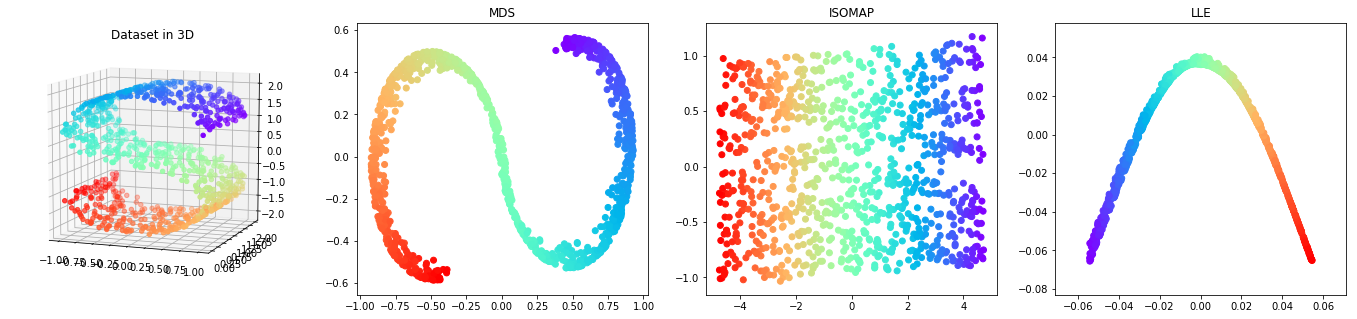

In [12]:
fig = plt.figure(figsize = (24, 5))

colorize = dict(c = St, cmap = plt.cm.get_cmap('rainbow'))
a = fig.add_subplot(1, 4, 1, projection = '3d')
a.scatter3D(SX[:, 0], SX[:, 1], SX[:, 2], **colorize)
a.view_init(azim=-70, elev=10)
a.set_title('Dataset in 3D')

# Performing MDS
Y_values_MDS = MDS(SX, 100, output_dim = 2)
b = fig.add_subplot(1, 4, 2)
b.scatter(Y_values_MDS[:, 0], Y_values_MDS[:, 1], **colorize)
b.set_title('MDS')

# Performing ISOMAP
Y_values = ISOMAP(SX, 20, output_dim = 2)
c = fig.add_subplot(1, 4, 3)
c.scatter(Y_values[:, 0], Y_values[:, 1], **colorize)
c.set_title('ISOMAP')

# Performing LLE
Y_values = LLE(SX, 30, output_dim = 2)
d = fig.add_subplot(1, 4, 4)
d.scatter(Y_values[:, 0], Y_values[:, 1], **colorize)
d.set_title('LLE')

plt.show()


# Clustering and Visualizing High-Dimensional Data

Performing K-means and spectral clustering on the Swiss Roll dataset and visualizing using the above implemented methods.

### Discussion

- MDS is not really effective in unrolling the data into a linear form.

- However, MDS can act as a good visualization for the data structure in lower dimensional space.

- LLE and ISOMAP work out well with high dimensional non linear manifolds. The resultant structure has an almost linear structure to it.

- Spectral Clustering is not an effective algorithm for assigning labels to datapoints in a Swiss Roll.

- Also note that it is difficult even for a human being to partition the visual space in the Swiss Roll into two intuitive clases.

- LLE preserves local structures while going from higher to lower dimensions. This is unlike ISOMAP which tries to preserve manifold distances between pairs of points.

- ISOMAP performs really well as a pre-processing for classifiers. It induces a nice separation between the two classes.

In [13]:
# Loading swiss roll dataset
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
# Uncomment to View Shape
# print(swissroll.shape)

#### Approaches:

1. Performing spectral clustering (2 clusters) on the unchanged Swiss Roll followed by visualization.

2. Unwrapping the manifold in 2D and visualizing using:
  - MDS
  - ISOMAP
  - LLE

In [14]:
from sklearn.cluster import KMeans

In [15]:
# computations

def get_k_means_labels(data):
    kmeans = KMeans(n_clusters = 2, random_state = 0).fit(data)
    return kmeans.labels_

labels = get_k_means_labels(swissroll)
labels_spectral = spectral_clustering(swissroll)

Y_MDS = MDS(swissroll, 100, output_dim = 2)
Y_ISOMAP = ISOMAP(swissroll, 20, output_dim = 2)
Y_LLE = LLE(swissroll, 30, output_dim = 2)

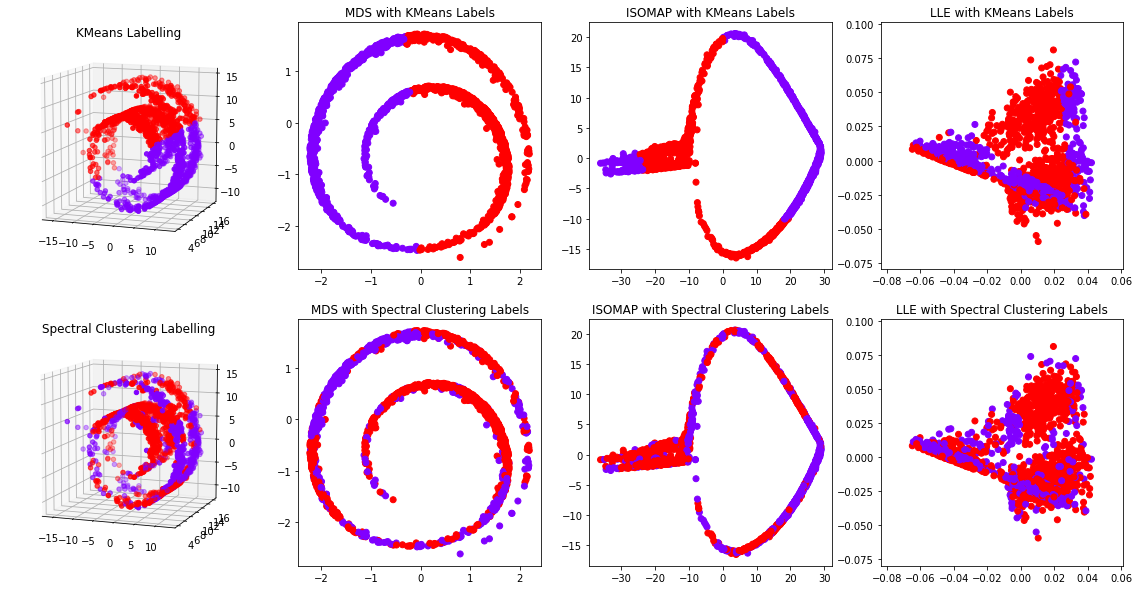

In [16]:
# plot generations

fig = plt.figure(figsize = (20, 10))

colorize = dict(c = labels, cmap = plt.cm.get_cmap('rainbow', 2))

a = fig.add_subplot(2, 4, 1, projection='3d')
a.scatter3D(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], **colorize)
a.view_init(azim = -70, elev = 10)
a.set_title('KMeans Labelling')

b = fig.add_subplot(2, 4, 2)
b.scatter(Y_MDS[:, 0], Y_MDS[:, 1], **colorize)
b.set_title('MDS with KMeans Labels')

c = fig.add_subplot(2, 4, 3)
c.scatter(Y_ISOMAP[:, 0], Y_ISOMAP[:, 1], **colorize)
c.set_title('ISOMAP with KMeans Labels')

d = fig.add_subplot(2, 4, 4)
d.scatter(Y_LLE[:, 0], Y_LLE[:, 1], **colorize)
d.set_title('LLE with KMeans Labels')

colorize = dict(c = labels_spectral, cmap=plt.cm.get_cmap('rainbow', 2))

e = fig.add_subplot(2, 4, 5, projection='3d')
e.scatter3D(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], **colorize)
e.view_init(azim = -70, elev = 10)
e.set_title('Spectral Clustering Labelling')

f = fig.add_subplot(2, 4, 6)
f.scatter(Y_MDS[:, 0], Y_MDS[:, 1], **colorize)
f.set_title('MDS with Spectral Clustering Labels')

g = fig.add_subplot(2, 4, 7)
g.scatter(Y_ISOMAP[:, 0], Y_ISOMAP[:, 1], **colorize)
g.set_title('ISOMAP with Spectral Clustering Labels')

h = fig.add_subplot(2, 4, 8)
h.scatter(Y_LLE[:, 0], Y_LLE[:, 1], **colorize)
h.set_title('LLE with Spectral Clustering Labels')

plt.show()



---



# Classification

Evaluating classification schemes using 6000 images from the CIFAR-10 dataset (5000 for training and 1000 for testing).


1. Dimensionality reduction on the dataset using PCA and ISOMAP.
2. Applying the classification algorithm.
3. Comparing results by changing the dimensionality of the data.

-   Using F1-score as metric.




## Discussion

#### As a systematic method of dimensionality reduction, PCA is the clear winner here. For the CIFAR10 datapoints, PCA gives better accuracies and F1 scores than ISOMAP while being sent out to the very same classifier.

- The key here is the form of data itself. Had the data been on a high dimensional manifold, ISOMAP would have easily beaten PCA. However, CIFAR10 images have no such properties.

- Say, we capture the same object from various locations leading to different orientations of the same form, then, images of particular objects might lie on a manifold structure.

- PCA minimizes the reconstruction loss. Hence, the datapoints in the latent space with reduced dimensions is a better representative of a denoised version of the original dataset.

In [17]:
# Loading the CIFAR-10 dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[: 5000].reshape([5000, 32 * 32 * 3])
y_train = y_train[: 5000]
X_test = X_test[: 1000].reshape([1000, 32 * 32 * 3])
y_test = y_test[: 1000]
# Initial dimensionality/number of features (32 * 32 * 3) = 3072.

Using TensorFlow backend.


In [18]:
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.metrics import f1_score

In [19]:
def reductionUsingPCA(X, k, output_dim):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data
    - returns pca_X, a numpy.array of shape [n_samples, output_dim]
  '''
  pca = PCA(n_components = output_dim)
  pca_X = pca.fit_transform(X)
  return pca_X

In [20]:
def reductionUsingISOMAP(X, k, output_dim):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data
    returns isomap_X, a numpy.array of shape [n_samples, output_dim]
  '''
  isomap = Isomap(n_neighbors = k, n_components = output_dim)
  isomap_X = isomap.fit_transform(X)
  return isomap_X

In [21]:
# Classification Setup
def classification(X, n_classes, model):
  '''
    X: numpy.array of shape [n_samples, input_dim]
    n_classes: number of classes
    - returns labels: a numpy_array of shape [n_samples]
  '''
  return model.predict(X)

In [22]:
# MLP Classifier

def train(X, y):
    model = mlp(hidden_layer_sizes=(256, 512, 128), max_iter = 1000)
    model.fit(X, y)
    return model

In [23]:
def F1_score(y_true, y_pred):
  '''
    y_true: numpy.array of shape [n_samples]; ground truth value
    y_pred: numpy.array of shape [n_samples]; predicted value by classifier
    - returns f1-score of type float
  '''
  return f1_score(y_true, y_pred, average = 'weighted')

In [24]:
train_size = len(y_train)
test_size = len(y_test)

y_train_vec = []
y_test_vec = []

for i in range(train_size):
    y_train_vec.append(y_train[i][0])
y_train_vec = np.array(y_train_vec)

for i in range(test_size):
    y_test_vec.append(y_test[i][0])
y_test_vec = np.array(y_test_vec)

In [25]:
# Reduction with PCA

# Reducing Dimensions separately for Train and Test
X_train_pca = reductionUsingPCA(X_train, 50, 50)
X_test_pca = reductionUsingPCA(X_test, 50, 50)

model = train(X_train_pca, y_train_vec)
pred = classification(X_test_pca, 10, model)

count = 0
for i in range(test_size):
    if pred[i] == y_test_vec[i]:
        count += 1

print("PCA with 50 components")
print("Percentage Accuracy: ", (count / test_size * 100))
print("F1 score: ", F1_score(y_test_vec, pred))

PCA with 50 components
Percentage Accuracy:  22.6
F1 score:  0.22580908503887986


In [26]:
# Reduction with ISOMAP

# Reducing Dimensions separately for Train and Test
X_train_ISOMAP = reductionUsingISOMAP(X_train, 20, 50)
X_test_ISOMAP = reductionUsingISOMAP(X_test, 20, 50)

model = train(X_train_ISOMAP, y_train_vec)
pred = classification(X_test_ISOMAP, 10, model)

count = 0
for i in range(test_size):
    if pred[i] == y_test_vec[i]:
        count += 1

print("ISOMAP with 50 components")
print("Percentage Accuracy: ", (count / test_size * 100))
print("F1 score: ", F1_score(y_test_vec, pred))

ISOMAP with 50 components
Percentage Accuracy:  11.3
F1 score:  0.0728823198504646


# $Thank\ You$

---